## EE-361M Introduction to Data Mining
## Assignment #3
## Due: Thursday, Mar 4, 2016 by midnight; Total points: 50


Your homework should be written in a **Jupyter notebook** (if this isn't possible, let me know). Please use this naming format for your notebook you submit: **Group(Group Num)_HW(HW Number).ipynb**. For example, Group1_HW1.ipynb. Homeworks should be submitted through Canvas in your **groups of 3 from the first homework**. If groups need to be adjusted please contact the TA. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In [4]:
#imports
#Please run this cell before any others
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as py
%matplotlib inline

## Question 1 (2+1 = 3 points)

View the video at:

https://www.youtube.com/watch?v=jbkSRLYSojo

(Hans Rosling's 200 Countries, 200 Years, 4 Minutes) and answer the following questions:

1. How many variables are being visualized in the “moving bubble plots” video (list them)?

2. Identify a variable that is “zoomed into”, i.e., examined at a sub-category or more detailed level.


FACTOID: Rosling’s gapminder visualization

(see https://www.youtube.com/user/Gapcast for some more insightful videos) can now be

readily used by you via Google Charts: https://developers.google.com/chart/interactive/docs/gallery

Just plug in your own variables into “Bubble Chart” under the URL above and go!

### 1.
    5. Wealth, income, time, continent, and country (more if you include the sub providences like he did in china)
    
### 2. 
    The country data is sometimes broken down into providences or states, like in China. Additionally, he mentions that the countries and providences have been broken down into other categories like rural vs municipal.

## Question 2 (3+3+2+2=10 points)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The dataset is prostate cancer data. The data can be found on canvas on the homework 3 page as prostate.csv. More information on the data can be found [here](https://cran.r-project.org/web/packages/ElemStatLearn/ElemStatLearn.pdf) under prostate. Use a random state of 42 and a test size of 1/3 to [split the data into training and test](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). We will be using all the variables to predict lcavol. 

1. Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter lambda (Note: lambda is called alpha in sklearn), use [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100]  for ridge and [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] for lasso. Report the best chosen based on cross-validation. The cross validation should happen on your training data using  average MSE as the scoring metric.
2. Run ridge and lasso for all of the parameters specified above (on all training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? 
3. Run least squares regression, ridge, and lasso on the full training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error on the test data for each.
4. For the best lasso parameter, determine the variables that were not dropped. Using only these variables, run least squares regression on full training data and report the prediction error on the test data.


In [5]:
#I request that you run the Problem 2 cells in the order they are in
#If not, I cannot garuntee that any particular cell will work
#Unfortunately I have coupled my design between the various cells. While I'm not fixing it this time around,
#I will try to decouple cells next time.

#Generic Init Stuff

data = pd.read_csv("prostate.csv")
trainData, testData = train_test_split(data, test_size=.33, random_state=42)
X = trainData.drop(['lcavol'], axis=1)
y = trainData['lcavol']
testX = testData.drop(['lcavol'], axis=1)
truey = testData['lcavol']

lassoAlphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] 
ridgeAlphas = [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100] 

ridge = Ridge(copy_X=True)
lasso = Lasso(copy_X=True)
bestLassoScore = 100.0
bestRidgeScore = 100.0

In [6]:
#Part 1

kf = KFold(len(X), n_folds=5)
for i in  range(0, len(ridgeAlphas)):
    ridge.alpha = ridgeAlphas[i]
    lasso.alpha = lassoAlphas[i]
    ridgeScore = abs(np.mean((cross_val_score(ridge, X, y, scoring='mean_squared_error', cv=kf))))
    lassoScore = abs(np.mean((cross_val_score(lasso, X, y, scoring='mean_squared_error', cv=kf))))
    if ridgeScore < bestRidgeScore: #new better alpha found!
        bestRidgeScore = ridgeScore
        bestRidgeAlpha = ridgeAlphas[i]
    if lassoScore < bestLassoScore: #new better alpha found!
        bestLassoScore = lassoScore
        bestLassoAlpha = lassoAlphas[i]

print "Best lambda for ridge: ", bestRidgeAlpha, " with absolute average score of: ", bestRidgeScore
print "Best lambda for lasso: ", bestLassoAlpha, " with absolute average score of: ", bestLassoScore

#in the event that I got the best lambda for lasso or ridge wrong, please fix bestRidgeAlpha and bestLassoAlpha
#respectively. The other parts of this question depend on these variables.

Best lambda for ridge:  10  with absolute average score of:  0.552109788345
Best lambda for lasso:  0.1  with absolute average score of:  0.560122875264


As lambda changes, the coefficent seems to steadily converge.


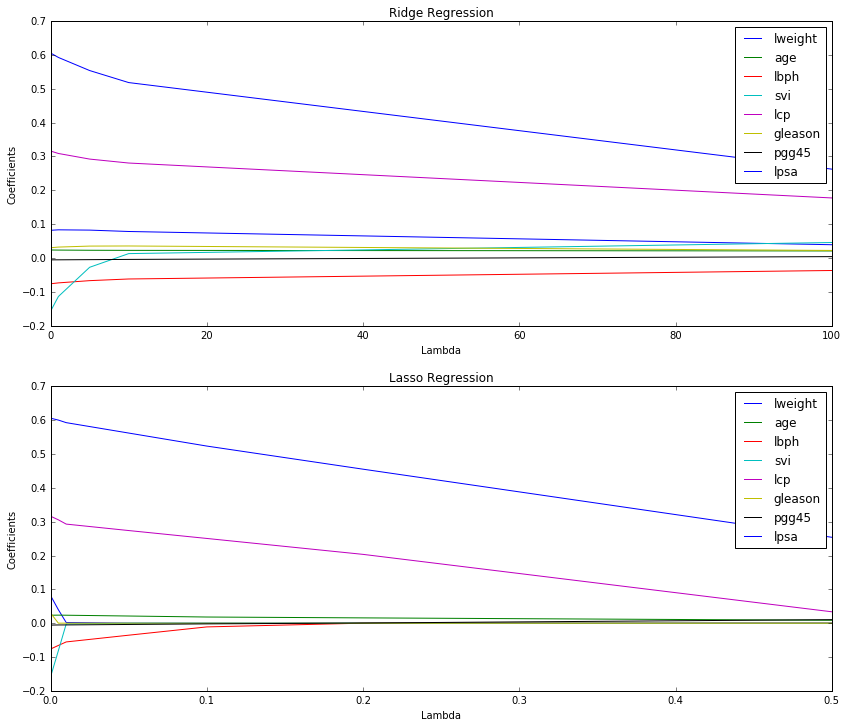

In [7]:
#Part 2

#Graph Setup - making the X-axis arrays
ridgeCoefs = list()
lassoCoefs = list()
for x in range(0, len(X.columns)):
    ridgeCoefs.append(list())
    lassoCoefs.append(list())
    
#Graph Setup - making figure and setting axis
py.figure(figsize=(14,12))
ridgePlot = py.subplot(211)
py.xlabel("Lambda")
py.ylabel("Coefficients")
py.title("Ridge Regression")
lassoPlot = py.subplot(212)
py.xlabel("Lambda")
py.ylabel("Coefficients")
py.title("Lasso Regression")

#Calculating all the revelant data points
for i in  range(0, len(ridgeAlphas)):
    ridge.alpha = ridgeAlphas[i]
    lasso.alpha = lassoAlphas[i]
    ridge.fit(X, y)
    lasso.fit(X, y)
    for j in range(0, len(X.columns)):
        ridgeCoefs[j].append(ridge.coef_[j])
        lassoCoefs[j].append(lasso.coef_[j])

#Plot
for k in range(0, len(X.columns)):
    ridgePlot.plot(ridgeAlphas, ridgeCoefs[k], label=X.columns[k])
    lassoPlot.plot(lassoAlphas, lassoCoefs[k], label=X.columns[k])
ridgePlot.legend()
lassoPlot.legend()

#Answer the question
print "As lambda changes, the coefficent seems to steadily converge."


In [8]:
#Part 3

ridge2 = Ridge(alpha=bestRidgeAlpha, copy_X=True)
lasso2 = Lasso(alpha=bestLassoAlpha, copy_X=True)
linear = LinearRegression()

ridge2.fit(X, y)
lasso2.fit(X, y)
linear.fit(X, y)

ridgePredictions = ridge2.predict(testX)
lassoPredictions = lasso2.predict(testX)
linearPredictions = linear.predict(testX)


print "Ridge Regression MSE: ",mean_squared_error(truey, ridgePredictions)
print "Lasso Regression MSE: ", mean_squared_error(truey, lassoPredictions)
print "Linear Regression MSE: ", mean_squared_error(truey, linearPredictions)

Ridge Regression MSE:  0.544994235195
Lasso Regression MSE:  0.564961986751
Linear Regression MSE:  0.543783938173


In [9]:
#Part 4

#Finding the features that were dropped by lasso, stored as column indexes in dropped
lasso3 = Lasso(alpha=bestLassoAlpha, copy_X=True)
lasso3.fit(X, y)
notDroppedIndex = list()
for i in range(0, len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        notDroppedIndex.append(i)

#Cleaning our training and test data's independent variable to get rid of all the dropped features
notDroppedData = list()
notDroppedTest = list()
for i in range(0, len(notDroppedIndex)):
    notDroppedData.append(X[X.columns[notDroppedIndex[i]]]) #taking the dropped variables out one at a time
    notDroppedTest.append(testX[testX.columns[notDroppedIndex[i]]])
newData = pd.concat(notDroppedData, axis=1) #combining all dropped variables into a new dataframe
newTest = pd.concat(notDroppedTest, axis=1)

#Finally, testing the new subset of features
lineRegress = LinearRegression()
lineRegress = lineRegress.fit(newData, y)
lineRegressPredict = lineRegress.predict(newTest)
print "New Linear Regression MSE: ", mean_squared_error(truey, lineRegressPredict)

New Linear Regression MSE:  0.566328775677


## Question 3 (3+3+2+2 = 10 points)

Re-solve all the questions in question 2 using R. You can submit the code and results via a PDF or other format. Just please make a reference to it in your notebook. See hints.R on the Canvas homework 3 page to help get you started. I would recommend using [RStudio](https://www.rstudio.com/products/rstudio/download/) for your work in R.

## Question 4 (5+5 = 10 points)

1. Derive the coefficent updates, from first principles, for a gradient descent version of linear regression. Hint: start from the cost function. If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for a gradient descent version of linear regression. Should be similar to sklearn in that you have a fit function that takes an X, y, learning rate, and number of iterations and a predict funtion that takes an X value. Use your new SGD regression to re-run question 2.4 and compare MSE. Make sure you always normalize your X matrices and use an intercept. You can also compare your results with SGDRegressor from sklearn, but not required.

### Part 1:
    See attached question4-1.png
    
### Part 2:

In [32]:
import pylab
from sklearn.preprocessing import normalize
class gradientLinReg:
    
    def gradienLinReg(self):
        self.b0_coef = 1
        self.b1_coef = 1
    
    def stepGradient(self, b0_current, b1_current, indep_var, dep_var, learningRate):
        b0_gradient = 0
        b1_gradient = 0
        N = float(len(indep_var))
        for i in range(0, len(indep_var)):
            b0_gradient += -(2/N) * (dep_var[i] - ((b1_current*indep_var[i]) + b0_current))
            b1_gradient += -(2/N) * indep_var[i] * (dep_var[i] - ((b1_current * indep_var[i]) + b0_current))
        new_b0 = b0_current - (learningRate * b0_gradient)
        new_b1 = b1_current - (learningRate * b1_gradient)
        return new_b0, new_b1

    def gradientFit(self, indep_var, dep_var, learningRate, iterations):
        b0_current = 1
        b1_current = 1
        for i in range(0, iterations):
            b0_current, b1_current = self.stepGradient(b0_current, b1_current, indep_var, dep_var, learningRate)
        self.b0_coef = b0_current
        self.b1_coef = b1_current
    
    def gradientPredict(self, indep_var):
        estimation = []
        for i in range(0, len(indep_var)):
            estimation.append(b1_coef*indep_var + b0_coef)
        return estimation
    
    def getMSE(self, indep_var, dep_var):
        mse = 0
        for i in range(0, len(indep_var)):
            mse += ((1/N) * ((dep_var[i] - ((self.b1_coef*indep_var[i]) + self.b0_coef))**2))
        return mse
 
gradientLin = gradientLinReg()
gradientLin.gradientFit(normalize(newData['lpsa'].as_matrix().reshape(-1, 1), axis=1, norm='l1'), y, 1, 500)
gradientP = gradientLin.gradientPredict(normalize(newTest['lpsa'].as_matrix().reshape(-1, 1), axis=1, norm='l1'))
print "Gradient Linear Regression MSE: ", mean_squared_error(truey, gradientP)
    

KeyError: 0L

## Question 5 (2+1+5+2 = 10 points)

We will use Google's Tensorflow to create a simple multi-layered perceptron. Installation instructions can be found [here](https://www.tensorflow.org/versions/r0.7/get_started/os_setup.html#pip-installation). To make our lives even easier, we will be using [skflow](https://github.com/tensorflow/skflow). This can be installed via pip install skflow. This is a higher level API on top of tensorflow. You can find documentation on how to get started on the skflow page.

To install tensorflow, this command should work (did on Mac):

sudo pip install --upgrade https://storage.googleapis.com/tensorflow/mac/tensorflow-0.7.0-py2-none-any.whl --ignore-installed

1. Use pandas to get spam classification [data](https://archive.ics.uci.edu/ml/datasets/Spambase) from UCI. Don't worry about getting the column names. The last column is a 1 if spam, zero otherwise.
2. Split the data into training and testing using test_size=0.33, random_state=42.
3. Use a TensorFlowDNNClassifier to classify whether an email is spam and report your testing accuracy. You should use 1 hidden layer with 5 units, 50,000 steps, and a learning rate of .05. What does each parameter do and why does it matter?
4. Compare your accuracy to a logistic regression using sklearn. Discuss why one may have performed better than the other. You may also experiment with the architecture of your neural network (i.e. the number of hidden units, the number of nodes, the number of steps, and the learning rate) to see if you can improve your results from part 3.

In [ ]:
#help I broke everything, sorry
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, datasets, metrics
import skflow

#q5 pt1
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data",header=None)
# data[57] if 1 is spam, else 0

#q5 pt2
X = data.values[:,:57]
y = data.values[:,57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#q5 pt3
classifier = skflow.TensorFlowDNNClassifier(hidden_units=[5], n_classes=2,steps=50000,learning_rate=0.05)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, predicted)
print('Accuracy: {0:f}'.format(score))
print """n_classes define the number of classes in the target (in this case, spam or not spam). 
hidden_units is an array that describes the number of parameters per hidden layer (in this
case, 5 parameters in the sole hidden layer). steps define the number of steps to run over
the data. learning rate, when defined as a constant float, indicates that no decay function 
was used."""


In [ ]:
#q5 pt 4
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
lr_predicted = logreg.predict(X_test)
lr_score = metrics.accuracy_score(y_test, lr_predicted)
print('Accuracy: {0:f}'.format(lr_score))
print """In this case, plain old logistic regression massively outperforms deep learning model. This 
is mostly due to the fact that there are only {} data entries, passed through a single hidden layer
in the deep learning model. If several orders of magnitude more training data were provided, and 
the model complexity deepened through additional layers, the deep learning model would undoubtedly
catch up. I would test this hypothesis, but I fear for my dinky laptop, which is now effectively
a personal desk warmer.""".format(len(X))

## Question 6 (2+2+3 = 7 points)

1. State briefly what you understand by the bias-variance tradeoff.

2. For a given model and problem, what happens to these two quantities when the amount of training data available decreases, keeping all other factors remaining the same ( e.g. if 5-fold CV was used to train the original model, the same is used for the smaller dataset)?

3. Suppose you want to approximate the pdf of a continuous random variable $X$, that takes on values over the interval (a,b), as follows: Get $N$ i.i.d samples of $X$; bin the interval into $k$ equi-spaced bins, and construct a histogram, which you then normalize so that total area under the histogram is 1. This normalized histogram will be an approximation of the true pdf. Clearly the histogram will change if you repeat this experiment using another $N$ samples; hence you can consider the quality of the solution in term of the 'mean' histogram (bias) and the variations among the histograms (variance).  Qualitatively explain how you would expect the bias-variance tradeoff to be reflected in this situation, as a function of $k$.

#### Q6 solution

1. Bias-variance tradeoff refers to the balancing of bias and variance values when using different models. As models become more complex, bias decreases quadratically and variance increases linearly, but the mean squared error, being a sum of bias<sup>2</sup>, variance, and noise, can only be minimized at a particular level of model complexity.
2. Bias remains identical, but variance increases with less data. 
3. As *k* increases, bias decreases (quadratically) and variance increases (linearly). This is the same as increasing the complexity of the model in the bias-variance complexity graph. 